Test: Forward Process

In [13]:
from PIL import Image
import torch
import numpy as np
import math

from _5_ddpm import DDPMSampler

In [23]:
generator = torch.Generator()
generator.manual_seed(0)

ddpm_sampler = DDPMSampler(generator)

noise_levels = [0, 10, 50, 75, 100, 250, 500, 750]

img = Image.open("../images/mycat_512.jpg")
img_tensor = torch.tensor(np.array(img))
img_tensor = ((img_tensor / 255.0) * 2.0) - 1.0   # [-1, 1]

batch = img_tensor.repeat(len(noise_levels), 1, 1, 1)

ts = torch.tensor(noise_levels, dtype=torch.int, device=batch.device)
noise_imgs = []
epsilons = torch.randn(batch.shape, device=batch.device)

for i in range(len(ts)):
    a_hat = ddpm_sampler.alphas_cumprod[ts[i]]
    noise_imgs.append(
        (math.sqrt(a_hat) * batch[i]) + (math.sqrt(1 - a_hat) * epsilons[i])
    )

noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)

display_img = Image.fromarray(noise_imgs[5].squeeze(0).numpy(), 'RGB')

/tmp/ipykernel_1427917/2217647291.py:28: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display_img = Image.fromarray(noise_imgs[5].squeeze(0).numpy(), 'RGB')


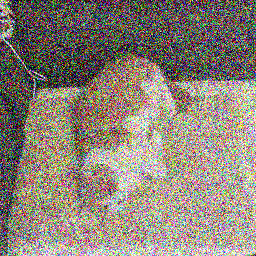

In [24]:
display_img